# Titanic Project
We will perform exploratory data analysis on the data, which is obtained from kaggle  [Titanic Data Set from Kaggle](https://www.kaggle.com/c/titanic). 
## Import Libraries
Let's import some libraries to get started!

In [250]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## The Data

Let's start by reading in the titanic_train.csv file into a pandas dataframe.

In [251]:
train = pd.read_csv('titanic_train.csv')

In [252]:
train.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


# Exploratory Data Analysis

Let's begin some exploratory data analysis! We'll start by checking out missing data!

## Missing Data

We can use seaborn to create a simple heatmap to see where we are missing data!

<AxesSubplot:>

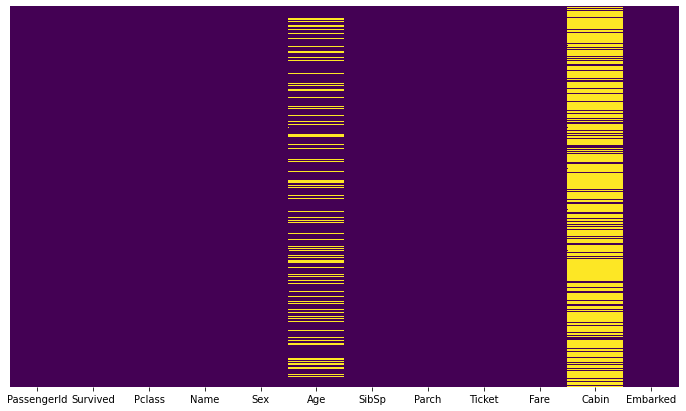

In [253]:
plt.figure(figsize=(12, 7))
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

Roughly 20 percent of the Age data is missing. The proportion of Age missing is likely small enough for reasonable replacement with some form of imputation. Looking at the Cabin column, it looks like we are just missing too much of that data to do something useful with at a basic level. We'll probably drop this later, or change it to another feature like "Cabin Known: 1 or 0"

Let's continue on by visualizing some more of the data! 

### Plotting Categorical Data

In [254]:
def sns_countplot (df,col1,hue1,color):
    # palette='RdBu_r'
    sns.countplot(x=col1,hue =hue1, data=train,palette=color)

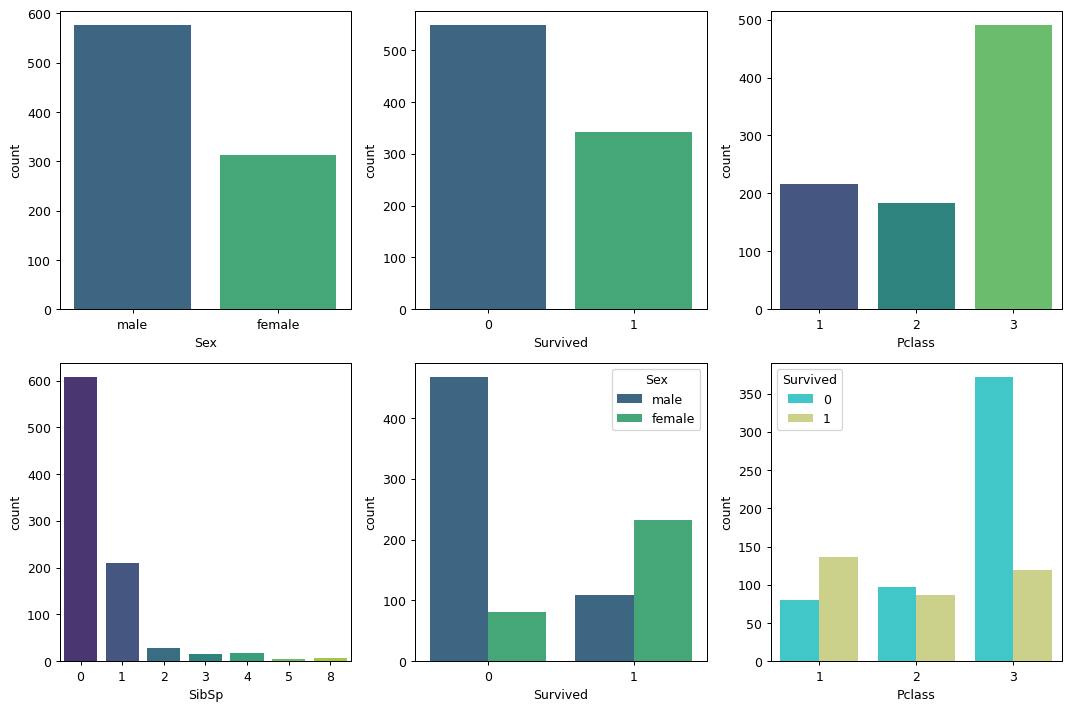

In [255]:
 # Plotting (countplots) of Categorical data/columns
plt.figure(figsize=(12,8),dpi = 90)
df = train
cols =['Survived','Sex','Pclass','SibSp','Fare','Age']
color =  'viridis'
for i in range(1,7):
    plt.subplot(2,3,i)
    
    if i==1:
        hue1 = None
        col1 =cols[1]
        sns_countplot (df,col1,hue1,color)
        
    elif i==2:
        hue1 = None
        col1 =cols[0]
        sns_countplot (df,col1,hue1,color)
        
    elif i==3:
        hue1 = None
        col1 =cols[2]
        sns_countplot (df,col1,hue1,color)
        
    elif i==4:
        hue1 = None
        col1 =cols[3]
        sns_countplot (df,col1,hue1,color)
  
    elif i == 5:
        hue1 = 'Sex'
        col1 =cols[0]
        sns_countplot (df,col1,hue1,color)
        
    elif i == 6:
        color =  'rainbow'
        hue1 = 'Survived'
        col1 =cols[2]
        sns_countplot (df,col1,hue1,color)   
plt.tight_layout()          
plt.show()

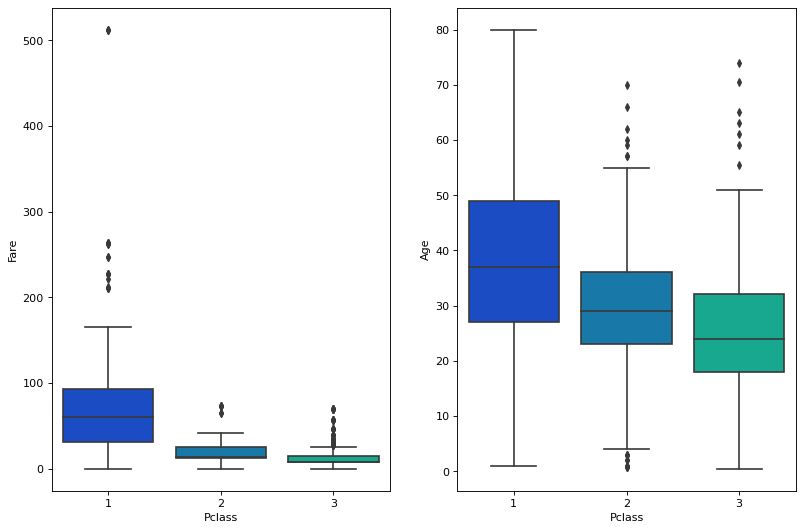

In [256]:
plt.figure(figsize=(12, 8),dpi =80) # Plotting (Box plot) of Categorical data/columns
for i in range(1,3):
    plt.subplot(1,2,i)
    if i==1:
        sns.boxplot(x='Pclass',y='Fare',data=train,palette='winter')
    else:
        sns.boxplot(x='Pclass',y='Age',data=train,palette='winter')
        
plt.show()

### Plotting Continous/Numerical Data

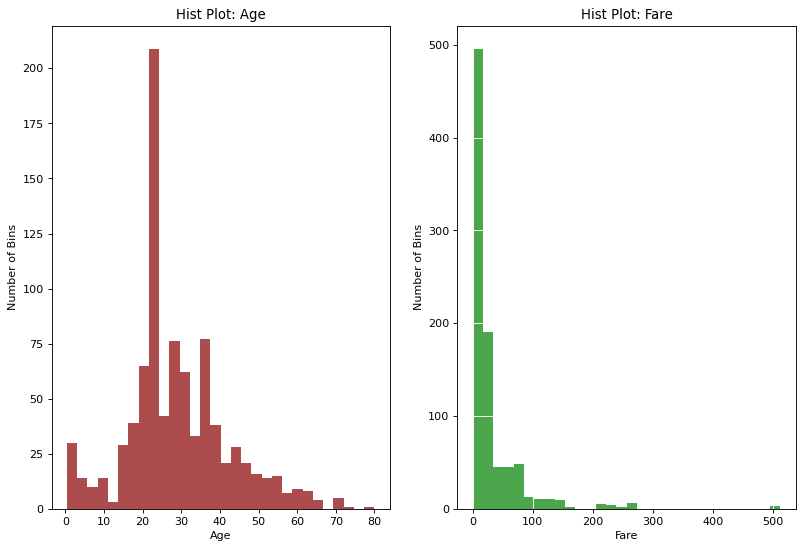

In [282]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,8),dpi =80)
for i in range(1,3):
    plt.subplot(1,2,i)
    if i ==1:
        train['Age'].hist(bins=30,color='darkred',alpha=0.7)
        plt.grid(False)
        plt.xlabel('Age')
        plt.ylabel('Number of Bins')
        plt.title('Hist Plot: Age')
    else:
        train['Fare'].hist(bins=30,color='green',alpha=0.7)
        plt.grid(color ='white')
        plt.xlabel('Fare')
        plt.ylabel('Number of Bins')
        plt.title('Hist Plot: Fare')
plt.show()


## Feature Engineering
We want to create three more columns (Prefix, Cabin_cat and new_ticket1) from columns, Name, Cabin and Ticket repsectively

In [258]:
def prefix_func (x):
    list1 = x.split()
    for i in list1:
        if i=='Dr.'or i=='Miss.' or i=='Mr.' or i =='Mrs.':
            return i
        

In [259]:
train['Prefix']=train['Name'].apply(prefix_func)

In [260]:
def Cabin_strip (x):
    if pd.isnull(x):
        return 'Missing'
    else:
        return x[0]

In [261]:
train['Cabin_cat']= train['Cabin'].apply(Cabin_strip)

In [262]:
train.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Prefix,Cabin_cat
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr.,Missing
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs.,C


In [263]:
#train['Ticket'].unique()

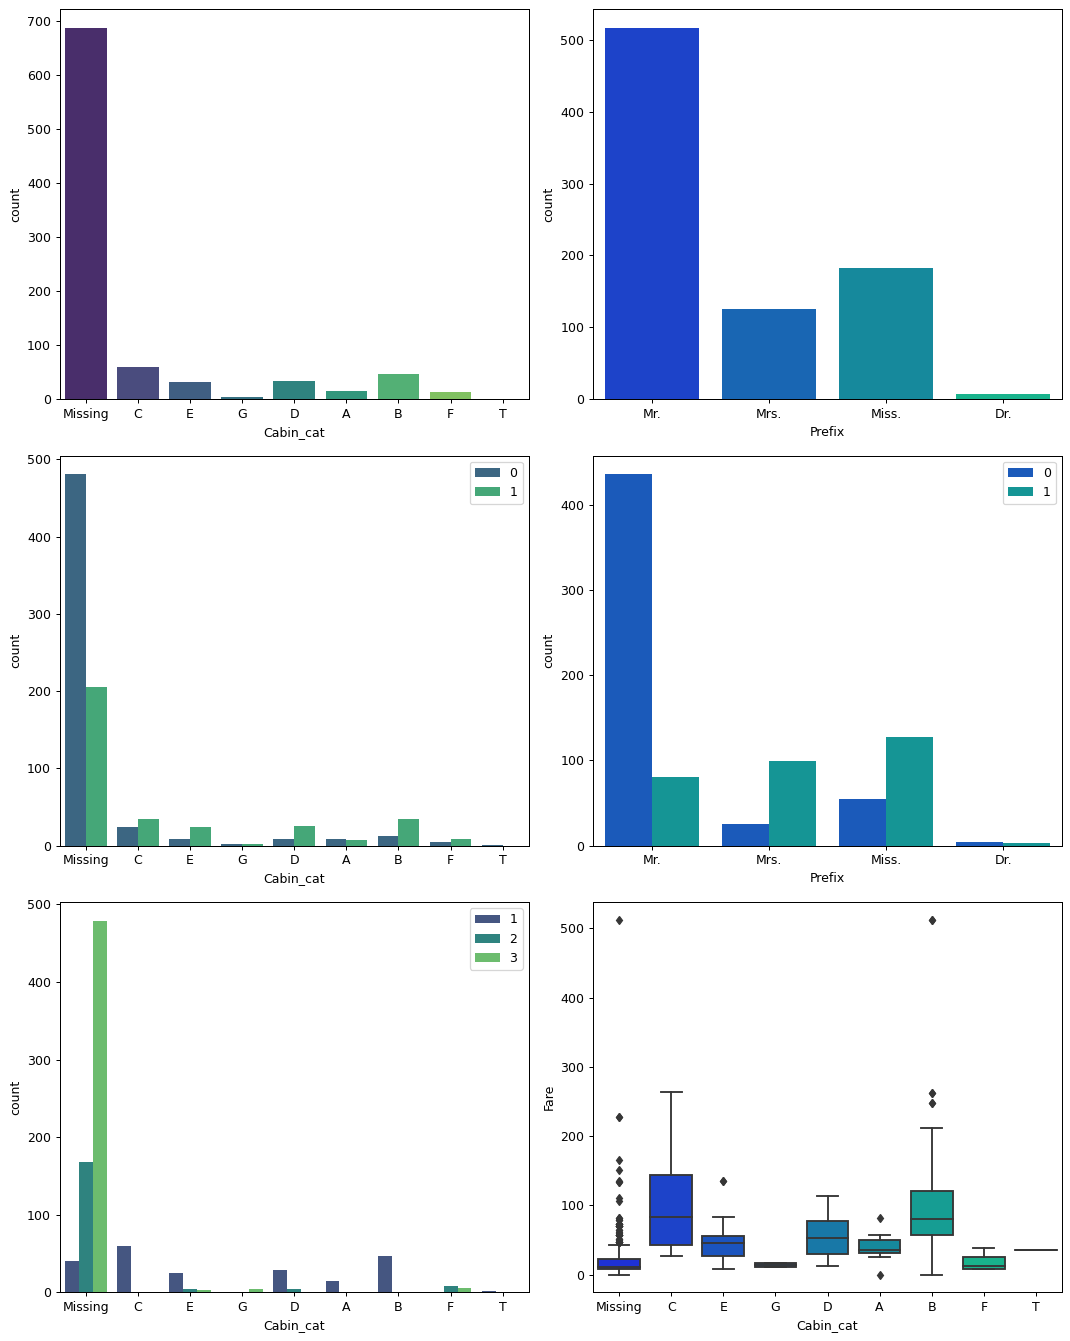

In [264]:
plt.figure(figsize=(12,15),dpi = 90)
df = train
color =  'viridis'
for i in range(1,7):
    plt.subplot(3,2,i)
    
    if i==1:
        color = 'viridis'
        hue1=None
        col1 =train['Cabin_cat']
        sns_countplot (df,col1,hue1,color) 
    elif i==2:
        color ='winter'
        hue1 = None
        col1 =train['Prefix']
        sns_countplot (df,col1,hue1,color)
        
    elif i==3:
        color = 'viridis'
        hue1 = 'Survived'
        col1 =train['Cabin_cat']
        sns.countplot(x= col1,hue =hue1, data=train,palette=color)
        plt.legend(loc='upper right')
    elif i==4:
        color = 'winter'
        hue1 = 'Survived'
        col1 = train['Prefix']
        sns.countplot(x= col1,hue =hue1, data=train,palette=color)
        plt.legend(loc='upper right')
    elif i== 5:
        color = 'viridis'
        hue1 ='Pclass'
        col1 =train['Cabin_cat']
        sns_countplot (df,col1,hue1,color)
        plt.legend(loc='upper right')
    else:
        sns.boxplot(x='Cabin_cat',y='Fare',data=train,palette='winter')
plt.tight_layout() 
plt.show()    

In [265]:
def ticket_func (x): # use regular expression to make it short and and fast
    list2 = ['1','2','3','4','5','6','7','8','9','10']
    list1 = x.split()
    if list1[0][0] in list2:
        return 'Number'
    if list1[0][0]=='A':
        return 'A5'
    if list1[0][0] =='C':
        return 'CA'
    if list1[0][0] =='W':
        return 'WC'   
    if list1[0][0] =='S' and (list1[0][1]=='C' or list1[0][2] =='C'):
        return 'SC'   
    if list1[0][0] =='S':
          return 'SO'
    if list1[0][0] =='F':
          return 'FC'
    if list1[0][0] =='P':
          return 'PP'
    else:
        return list1[0]

In [266]:
train['new_ticket1']=train['Ticket'].apply(ticket_func)

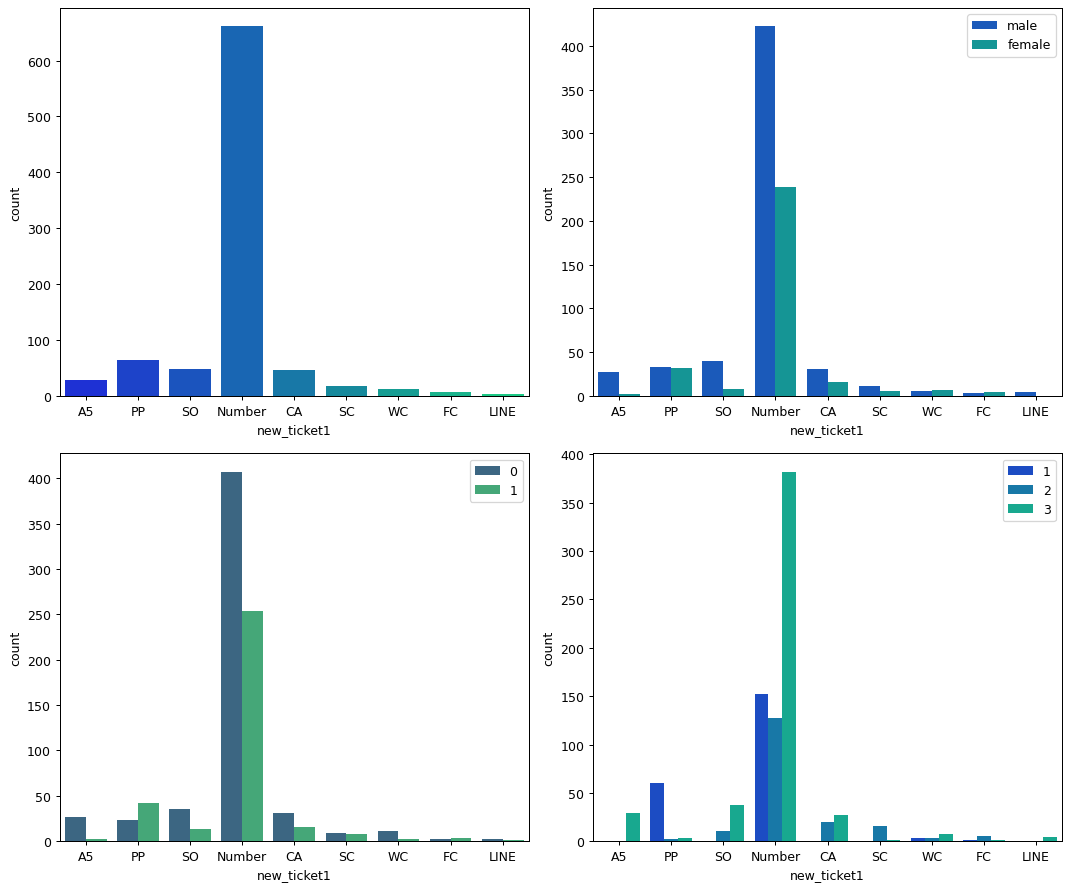

In [267]:
plt.figure(figsize=(12,10),dpi = 90)
df = train
color =  'viridis'
for i in range(1,5):
    plt.subplot(2,2,i)
    
    if i==1:
        color = 'winter'
        hue1 = None
        col1 =train['new_ticket1']
        sns.countplot(x= col1,hue =hue1, data=train,palette=color) 
    elif i==2:
        color = 'winter'
        hue1 = 'Sex'
        col1 =train['new_ticket1']
        sns.countplot(x= col1,hue =hue1, data=train,palette=color)   
        plt.legend(loc='upper right')
    elif i==3:
        color = 'viridis'
        hue1 = 'Survived'
        col1 =train['new_ticket1']
        sns.countplot(x= col1,hue =hue1, data=train,palette=color)
        plt.legend(loc='upper right')
    else:
        color = 'winter'
        hue1 = 'Pclass'
        col1 = train['new_ticket1']
        sns.countplot(x= col1,hue =hue1, data=train,palette=color)
        plt.legend(loc='upper right')
plt.tight_layout() 
plt.show()    

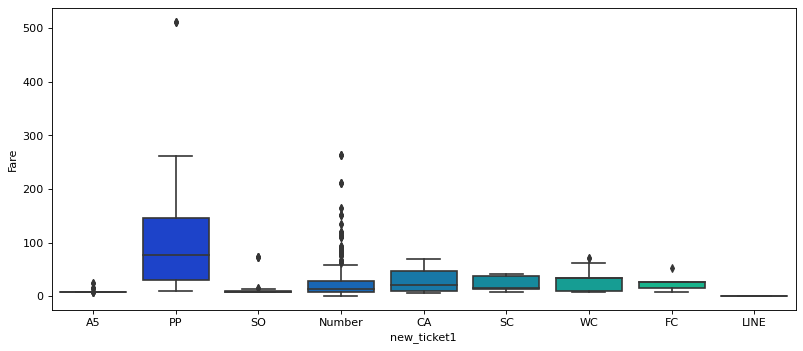

In [268]:
plt.figure(figsize=(12,5),dpi =80)
sns.boxplot(x='new_ticket1',y='Fare',data=train,palette='winter')
plt.show()

In [269]:
# drop('column-name', inplace=True, axis=1)
df = train.groupby('Cabin_cat').count()
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Prefix,new_ticket1
Cabin_cat,,,,,,,,,,,,,,
A,15,15,15,15,15,12,15,15,15,15,15,15,11,15
B,47,47,47,47,47,45,47,47,47,47,47,45,41,47
C,59,59,59,59,59,51,59,59,59,59,59,59,56,59
D,33,33,33,33,33,31,33,33,33,33,33,33,33,33
E,32,32,32,32,32,30,32,32,32,32,32,32,31,32
F,13,13,13,13,13,11,13,13,13,13,13,13,10,13
G,4,4,4,4,4,4,4,4,4,4,4,4,4,4
Missing,687,687,687,687,687,529,687,687,687,687,0,687,644,687
T,1,1,1,1,1,1,1,1,1,1,1,1,1,1


In [270]:
# train['Age'].hist(bins=30,color='darkred',alpha=0.7)
#plt.grid(color ='white')
#plt.xlabel('Age')
#plt.ylabel('Number of Bins')
#plt.title('Hist Plot: Age')

# sns.set_style('whitegrid')
# sns.countplot(x='Survived',hue='Sex',data=train,palette='viridis')

# sns.distplot(train['Age'].dropna(),kde=False,color='darkred',bins=30)

### Cufflinks for plots
 Let's take a quick moment to show an example of cufflinks!

In [271]:
import cufflinks as cf
# cf.go_offline()

In [272]:
# train['Fare'].iplot(kind='hist',bins=30,color='green')

## Data Cleaning
We want to fill in missing age data instead of just dropping the missing age data rows. One way to do this is by filling in the mean age of all the passengers (imputation).
However we can be smarter about this and check the average age by passenger class. For example:


<AxesSubplot:xlabel='Pclass', ylabel='Age'>

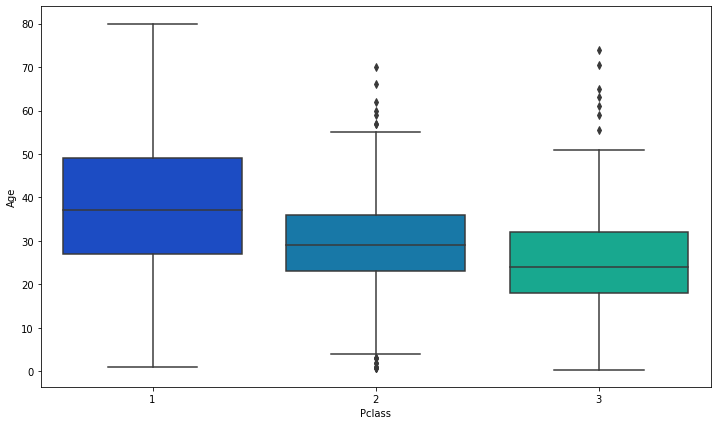

In [273]:
plt.figure(figsize=(12, 7))
sns.boxplot(x='Pclass',y='Age',data=train,palette='winter')                                                                                                                                                              

We can see the wealthier passengers in the higher classes tend to be older, which makes sense. We'll use these average age values to impute based on Pclass for Age.

In [274]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):

        if Pclass == 1:
            return 37

        elif Pclass == 2:
            return 29

        else:
            return 24

    else:
        return Age

Now apply that function!

In [275]:
train['Age'] = train[['Age','Pclass']].apply(impute_age,axis=1)

Now let's check that heat map again!

<AxesSubplot:>

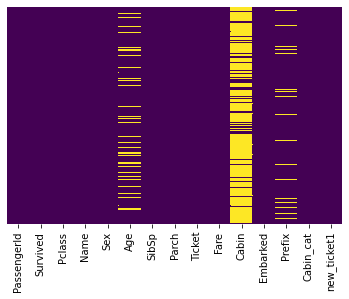

In [246]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

Great! Let's go ahead and drop the Cabin column and the row in Embarked that is NaN.

In [276]:
train.drop(['Cabin','new_ticket1'],axis=1,inplace=True)

In [277]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Prefix,Cabin_cat
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,Mr.,Missing
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,Mrs.,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,Miss.,Missing
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,Mrs.,C
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,Mr.,Missing


In [134]:
train.dropna(inplace=True)

## Converting Categorical Features 

We'll need to convert categorical features to dummy variables using pandas! Otherwise our machine learning algorithm won't be able to directly take in those features as inputs.

In [135]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 829 entries, 0 to 890
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  829 non-null    int64  
 1   Survived     829 non-null    int64  
 2   Pclass       829 non-null    int64  
 3   Name         829 non-null    object 
 4   Sex          829 non-null    object 
 5   Age          829 non-null    float64
 6   SibSp        829 non-null    int64  
 7   Parch        829 non-null    int64  
 8   Ticket       829 non-null    object 
 9   Fare         829 non-null    float64
 10  Embarked     829 non-null    object 
 11  Prefix       829 non-null    object 
 12  Cabin_cat    829 non-null    object 
 13  new_ticket   829 non-null    object 
dtypes: float64(2), int64(5), object(7)
memory usage: 97.1+ KB


In [278]:
sex = pd.get_dummies(train['Sex'],drop_first=True)
embark = pd.get_dummies(train['Embarked'],drop_first=True)
prefix= pd.get_dummies(train['Prefix'],drop_first=True)
Cabin= pd.get_dummies(train['Cabin_cat'],drop_first=True)

In [279]:
train.drop(['Sex','Embarked','Name','Ticket','Prefix','Cabin_cat'],axis=1,inplace=True)

In [280]:
train = pd.concat([train,sex,embark,prefix,Cabin],axis=1)

In [281]:
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S,...,Mr.,Mrs.,B,C,D,E,F,G,Missing,T
0,1,0,3,22.0,1,0,7.2500,1,0,1,...,1,0,0,0,0,0,0,0,1,0
1,2,1,1,38.0,1,0,71.2833,0,0,0,...,0,1,0,1,0,0,0,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1,...,0,0,0,0,0,0,0,0,1,0
3,4,1,1,35.0,1,0,53.1000,0,0,1,...,0,1,0,1,0,0,0,0,0,0
4,5,0,3,35.0,0,0,8.0500,1,0,1,...,1,0,0,0,0,0,0,0,1,0


## Now The Data is Reday for Modeling!